In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
# Read 'interaction file' to pandas dataframe
df = pd.read_csv('/home/cvigilv/Downloads/chembl23_GS3_v2.mphase_gt_0.txt.co', sep = '\t', engine = 'python', index_col = False)
df = df[['Ligand','Target']]

# 
df.sort_values(by =['Ligand', 'Target'], inplace = True)
df.drop_duplicates(inplace=True)
print(df)


           Ligand         Target
3092   CHEMBL1000      CHEMBL231
2018   CHEMBL1002      CHEMBL210
1919  CHEMBL10041      CHEMBL206
3275   CHEMBL1006      CHEMBL234
3544   CHEMBL1008      CHEMBL240
...           ...            ...
1813    CHEMBL998     CHEMBL2047
3147    CHEMBL998      CHEMBL231
5289    CHEMBL998  CHEMBL3351189
5490    CHEMBL998     CHEMBL3401
5713    CHEMBL998     CHEMBL3622

[9641 rows x 2 columns]


In [3]:
G = nx.from_pandas_edgelist(df, 'Ligand', 'Target')
ligs = set(df['Ligand'].values)
tars = set(df['Target'].values)
for u,v,d in G.edges(data=True):
    d['weight'] = 100
for u in ligs:
    G.nodes[u]['Type'] = 'Ligand'
for u in tars:
    G.nodes[u]['Type'] = 'Ligand'

print(nx.info(G))
print('Amount of ligand nodes: {}'.format(len(ligs)))
print('Amount of target nodes: {}'.format(len(tars)))

Name: 
Type: Graph
Number of nodes: 2129
Number of edges: 9641
Average degree:   9.0568
Amount of ligand nodes: 1232
Amount of target nodes: 897


In [4]:
def Jaccard(G, u, v):
    union_size = len(set(G[u]) | set(G[v]))
    if union_size == 0:
        return 0
    return len(list(nx.common_neighbors(G, u, v))) / union_size

In [5]:
G_copy = G.copy()
for i, u in enumerate(ligs):
    print(u, i/len(ligs)*100)
    for v in ligs:
        if u != v:
            j = Jaccard(G_copy, u, v)
            if j > 0:
                G.add_edge(u,v, weight = j)

CHEMBL595 0.0
CHEMBL1358 0.08116883116883117
CHEMBL119625 0.16233766233766234
CHEMBL1272307 0.2435064935064935
CHEMBL42442 0.3246753246753247
CHEMBL1774461 0.4058441558441558
CHEMBL1200624 0.487012987012987
CHEMBL1873475 0.5681818181818182
CHEMBL1230122 0.6493506493506493
CHEMBL436 0.7305194805194805
CHEMBL479 0.8116883116883116
CHEMBL957 0.8928571428571428
CHEMBL1829174 0.974025974025974
CHEMBL1200803 1.0551948051948052
CHEMBL3301601 1.1363636363636365
CHEMBL1084617 1.2175324675324677
CHEMBL1189679 1.2987012987012987
CHEMBL490 1.37987012987013
CHEMBL159 1.461038961038961
CHEMBL398440 1.5422077922077921
CHEMBL1401 1.6233766233766231
CHEMBL29411 1.7045454545454544
CHEMBL1473 1.7857142857142856
CHEMBL511 1.8668831168831168
CHEMBL1297 1.948051948051948
CHEMBL787 2.029220779220779
CHEMBL1544 2.1103896103896105
CHEMBL267431 2.1915584415584415
CHEMBL3545414 2.272727272727273
CHEMBL482968 2.353896103896104
CHEMBL894 2.4350649350649354
CHEMBL1262 2.5162337662337664
CHEMBL1319362 2.597402597402

CHEMBL45305 22.15909090909091
CHEMBL175247 22.24025974025974
CHEMBL49 22.321428571428573
CHEMBL1236962 22.4025974025974
CHEMBL76 22.483766233766232
CHEMBL483158 22.564935064935064
CHEMBL506981 22.6461038961039
CHEMBL781 22.727272727272727
CHEMBL1950554 22.808441558441558
CHEMBL1337 22.88961038961039
CHEMBL1200969 22.97077922077922
CHEMBL598172 23.051948051948052
CHEMBL375611 23.133116883116884
CHEMBL87563 23.214285714285715
CHEMBL1401508 23.295454545454543
CHEMBL1399 23.376623376623375
CHEMBL1201353 23.45779220779221
CHEMBL1185 23.53896103896104
CHEMBL1289494 23.62012987012987
CHEMBL1196 23.7012987012987
CHEMBL34259 23.782467532467532
CHEMBL384467 23.863636363636363
CHEMBL248702 23.944805194805195
CHEMBL878 24.025974025974026
CHEMBL1230165 24.107142857142858
CHEMBL377300 24.18831168831169
CHEMBL429876 24.269480519480517
CHEMBL1200748 24.350649350649352
CHEMBL1502 24.431818181818183
CHEMBL1419 24.512987012987015
CHEMBL350775 24.594155844155843
CHEMBL24 24.675324675324674
CHEMBL269864 24

CHEMBL815 45.12987012987013
CHEMBL482950 45.211038961038966
CHEMBL938 45.2922077922078
CHEMBL124660 45.37337662337662
CHEMBL945 45.45454545454545
CHEMBL729 45.535714285714285
CHEMBL18 45.616883116883116
CHEMBL1437 45.69805194805195
CHEMBL2031465 45.77922077922078
CHEMBL1287853 45.86038961038961
CHEMBL1957287 45.94155844155844
CHEMBL413965 46.02272727272727
CHEMBL654 46.103896103896105
CHEMBL496102 46.185064935064936
CHEMBL1678 46.26623376623377
CHEMBL2 46.3474025974026
CHEMBL513909 46.42857142857143
CHEMBL635 46.50974025974026
CHEMBL914 46.590909090909086
CHEMBL1079742 46.67207792207792
CHEMBL1624 46.75324675324675
CHEMBL1475 46.83441558441558
CHEMBL1642 46.91558441558442
CHEMBL3581647 46.99675324675325
CHEMBL218291 47.07792207792208
CHEMBL607707 47.159090909090914
CHEMBL681 47.24025974025974
CHEMBL926 47.32142857142857
CHEMBL1356238 47.4025974025974
CHEMBL752 47.48376623376623
CHEMBL1123 47.564935064935064
CHEMBL6966 47.646103896103895
CHEMBL561132 47.72727272727273
CHEMBL1159 47.8084

CHEMBL253144 67.12662337662337
CHEMBL1289601 67.20779220779221
CHEMBL1254771 67.28896103896103
CHEMBL45 67.37012987012987
CHEMBL392149 67.4512987012987
CHEMBL395429 67.53246753246754
CHEMBL10878 67.61363636363636
CHEMBL582857 67.6948051948052
CHEMBL1684984 67.77597402597402
CHEMBL421 67.85714285714286
CHEMBL716 67.93831168831169
CHEMBL1940832 68.01948051948052
CHEMBL1294 68.10064935064936
CHEMBL197669 68.18181818181817
CHEMBL701 68.26298701298701
CHEMBL150894 68.34415584415584
CHEMBL440115 68.42532467532467
CHEMBL277535 68.5064935064935
CHEMBL98 68.58766233766234
CHEMBL286738 68.66883116883116
CHEMBL2336071 68.75
CHEMBL1027 68.83116883116884
CHEMBL1241855 68.91233766233766
CHEMBL49120 68.9935064935065
CHEMBL2146883 69.07467532467533
CHEMBL493982 69.15584415584416
CHEMBL1429 69.23701298701299
CHEMBL256147 69.31818181818183
CHEMBL1614725 69.39935064935064
CHEMBL895 69.48051948051948
CHEMBL311300 69.56168831168831
CHEMBL325424 69.64285714285714
CHEMBL1171837 69.72402597402598
CHEMBL575448

CHEMBL428647 90.01623376623377
CHEMBL431770 90.09740259740259
CHEMBL566315 90.17857142857143
CHEMBL1200904 90.25974025974025
CHEMBL1166 90.3409090909091
CHEMBL3402762 90.42207792207793
CHEMBL522987 90.50324675324676
CHEMBL383322 90.5844155844156
CHEMBL2110588 90.6655844155844
CHEMBL51 90.74675324675324
CHEMBL222863 90.82792207792207
CHEMBL7301 90.9090909090909
CHEMBL111 90.99025974025975
CHEMBL241694 91.07142857142857
CHEMBL1789941 91.15259740259741
CHEMBL362558 91.23376623376623
CHEMBL19215 91.31493506493507
CHEMBL22587 91.3961038961039
CHEMBL611 91.47727272727273
CHEMBL325109 91.55844155844156
CHEMBL135 91.6396103896104
CHEMBL1272 91.72077922077922
CHEMBL642 91.80194805194806
CHEMBL517712 91.88311688311688
CHEMBL1355 91.96428571428571
CHEMBL1107 92.04545454545455
CHEMBL1095032 92.12662337662337
CHEMBL24778 92.20779220779221
CHEMBL1200993 92.28896103896103
CHEMBL846 92.37012987012987
CHEMBL1221 92.4512987012987
CHEMBL1219 92.53246753246754
CHEMBL2037511 92.61363636363636
CHEMBL648 92.

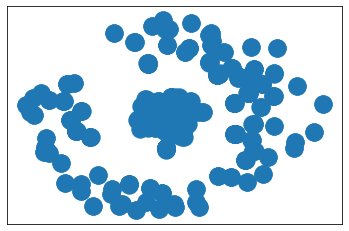

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.read_graphml('Jaccard.graphml')
pos = nx.spring_layout(G, iterations = 100, weight = 'weight')
nx.draw_networkx(G, pos = pos, with_labels = False)
plt.show()